In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

sys.path.insert(1, "../src")
from Loess import *

In [2]:
df = pd.read_csv("datasets/dataset.csv").sort_values(by='radiation')

# Data
X = df[["radiation", "temperature", "wind"]].to_numpy()
# Target variable
y = df["ozone"].to_numpy()

In [27]:
loess = Loess(X, y)
y_hat = np.array([loess.estimate(x, window=111) for x in X])

Text(0, 0.5, 'Ozone')

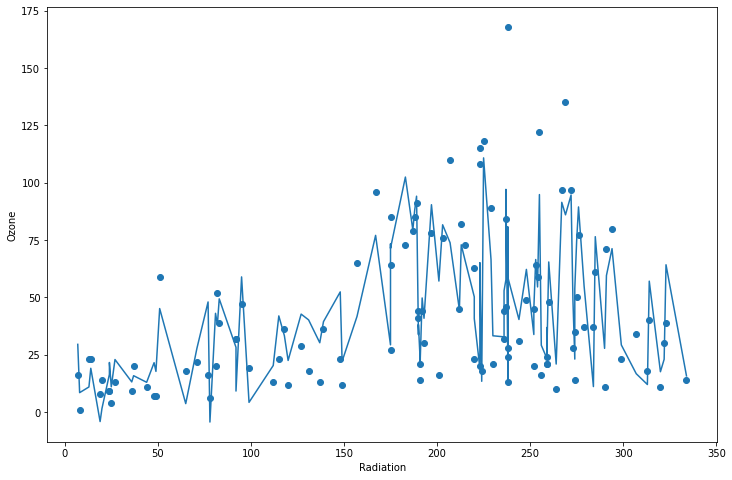

In [28]:
fig = plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], y_hat)
plt.xlabel("Radiation")
plt.ylabel("Ozone")

---
Probando con la seno

In [4]:
X = np.linspace(0, 2, num=100)
y = np.sin(X * np.pi) + (np.random.normal(0, 0.15, size=len(X)))

l = Loess(X, y)

In [28]:
y_t = np.array([l.estimate(x, window=25, degree=2) for x in X.reshape((100,1))])

/var/folders/gp/wt9hgpz57h3csqpdkfyvswl40000gn/T/ipykernel_49769/1308154631.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_t = np.array([l.estimate(x, window=25, degree=2) for x in X.reshape((100,1))])


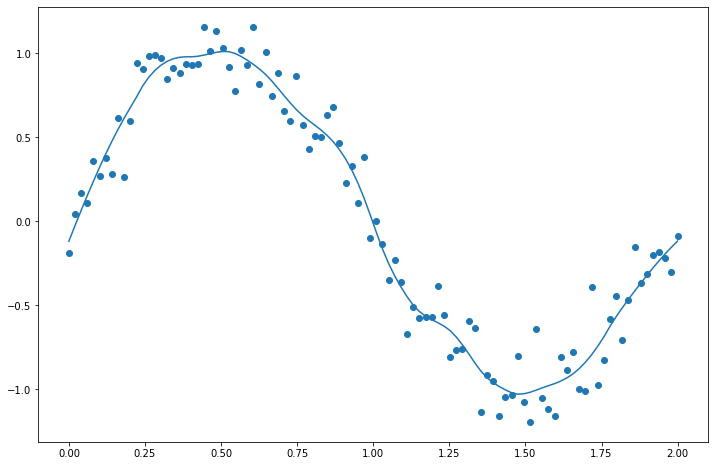

In [29]:
fig = plt.figure(figsize=(12,8))
plt.scatter(X, y)
plt.plot(X, y_t[:,2])
plt.show()

---

In [15]:
from sklego.linear_model import LowessRegression

In [24]:
mod = LowessRegression(sigma=44, span=0.1).fit(X, y)
preds = mod.predict(X)

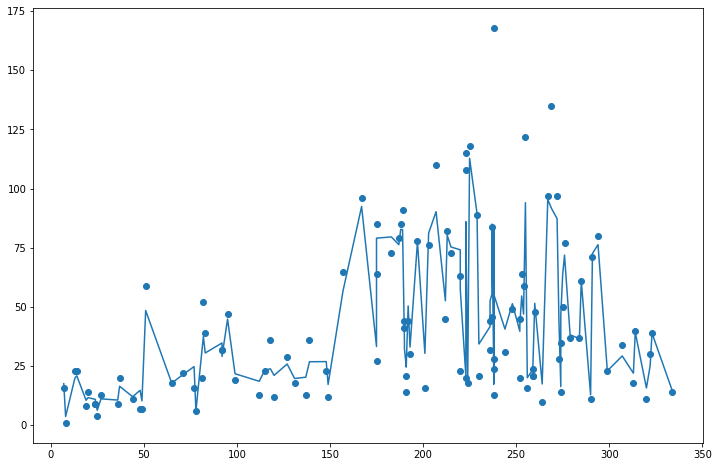

In [25]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], preds)

Text(0, 0.5, 'Ozone')

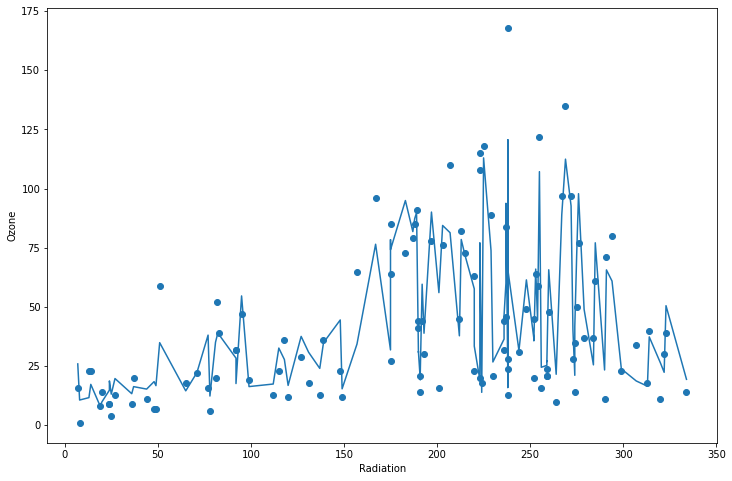

In [26]:
fig = plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], y_hat)
plt.xlabel("Radiation")
plt.ylabel("Ozone")